In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('Customer_Features.csv')
df1 = df

In [170]:
df1.head()

,CustomerID,Total_Spend,Transaction_Count,Unique_Products,Unique_Categories,Customer_Tenure,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,0.308942,0.4,0.444444,0.666667,0.842204,0,0,0,1
1,C0002,0.168095,0.3,0.333333,0.333333,0.979458,1,0,0,0
2,C0003,0.249541,0.3,0.333333,0.666667,0.276377,0,0,0,1
3,C0004,0.497806,0.7,0.777778,0.666667,0.757236,0,0,0,1
4,C0005,0.184287,0.2,0.222222,0.333333,0.808590,1,0,0,0


In [172]:
features_for_clustering = df1.drop(columns=['CustomerID'])

In [174]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(features_for_clustering )

from sklearn.metrics import silhouette_score
initial_silhouette_score = silhouette_score(features_for_clustering , df1['Cluster'])
print(f"Silhouette Score for 3 clusters: {initial_silhouette_score}")

Silhouette Score for 3 clusters: 0.42146821989799116


In [176]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(features_for_clustering )

from sklearn.metrics import silhouette_score
initial_silhouette_score_4 = silhouette_score(features_for_clustering , df1['Cluster'])
print(f"Silhouette Score for 4 clusters: {initial_silhouette_score_4}")

Silhouette Score for 4 clusters: 0.5433118483313173


In [178]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df1['Cluster'] = kmeans.fit_predict(features_for_clustering )

from sklearn.metrics import silhouette_score
initial_silhouette_score_5 = silhouette_score(features_for_clustering , df1['Cluster'])
print(f"Silhouette Score for 5 clusters: {initial_silhouette_score_5}")

Silhouette Score for 5 clusters: 0.48146737349400565


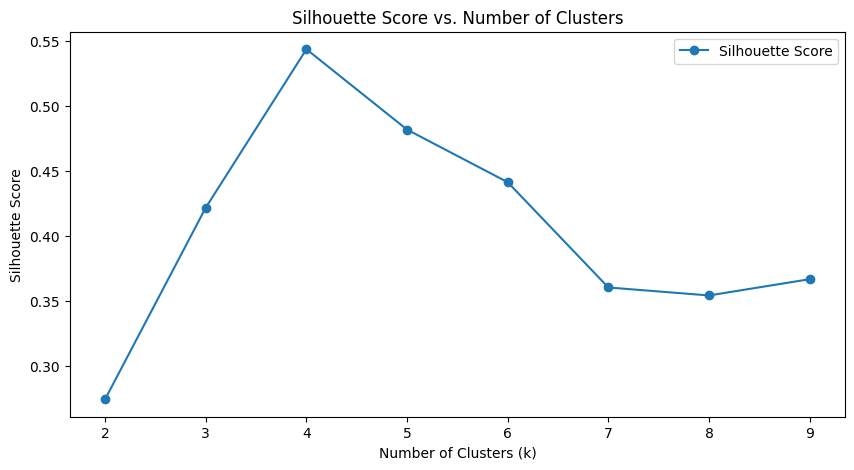

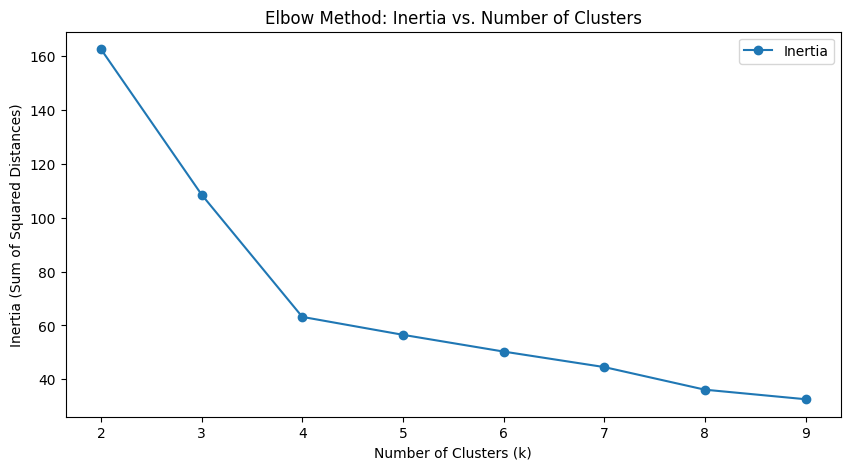

In [180]:
k_values = range(2, 10)
silhouette_scores = []
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_for_clustering)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_for_clustering, labels))

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.legend()
plt.show()

In [182]:
from sklearn.metrics import davies_bouldin_score

db_index_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_for_clustering)
    db_index = davies_bouldin_score(features_for_clustering, clusters)
    db_index_scores.append((k, db_index))

for k, db in db_index_scores:
    print(f"Clusters: {k}, DB Index: {db}")

Clusters: 2, DB Index: 1.2928759880264944
Clusters: 3, DB Index: 1.1560545922896168
Clusters: 4, DB Index: 0.7701272895221076
Clusters: 5, DB Index: 0.8667629179906943
Clusters: 6, DB Index: 0.9609576537357881
Clusters: 7, DB Index: 1.0718240850750043
Clusters: 8, DB Index: 1.056657659267714
Clusters: 9, DB Index: 1.0094412571620983
Clusters: 10, DB Index: 1.0053682309932075


In [184]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_for_clustering)
df1['KMeans_Cluster'] = kmeans_labels

print("KMeans Cluster Distribution:")
print(df1['KMeans_Cluster'].value_counts())

KMeans Cluster Distribution:
KMeans_Cluster
1    59
0    50
2    46
3    44
Name: count, dtype: int64


In [186]:
cluster_summary = df1.groupby('KMeans_Cluster')[['Total_Spend', 'Transaction_Count']].agg(['mean', 'median'])
print(cluster_summary)

               Total_Spend           Transaction_Count       
                      mean    median              mean median
KMeans_Cluster                                               
0                 0.306163  0.285533          0.368000   0.40
1                 0.343245  0.316519          0.415254   0.40
2                 0.304848  0.278700          0.430435   0.40
3                 0.318547  0.276661          0.395455   0.35


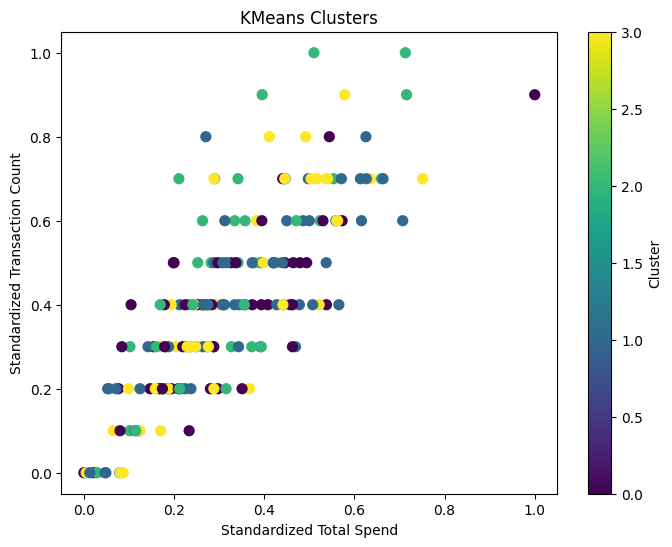

In [188]:
if isinstance(features_for_clustering, pd.DataFrame):
    features_for_clustering = features_for_clustering.values


plt.figure(figsize=(8, 6))
plt.scatter(features_for_clustering[:, 0], features_for_clustering[:, 1], 
            c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clusters')
plt.xlabel('Standardized Total Spend')
plt.ylabel('Standardized Transaction Count')
plt.colorbar(label='Cluster')
plt.show()